在这本篇中，你将计算苯-甲苯系统的预期蒸馏相图，假设苯-甲苯体系为理想体系。对于此篇，我们需要用到numpy和matplotlib.pyplot软件包。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

要计算蒸馏相图，你需要一些东西。首先你需要的第一件事是一种计算液体沸点温度的方法，第二件事是计算给定温度下液体蒸气压的方法，最后，你需要一种计算化合物在气相中的摩尔分数的方法，知道混合物中化合物的摩尔分数和化合物的蒸气压。对于前两项，我们可以使用克劳修斯-克拉佩龙方程：

$$ ln\frac{P_{1}}{P_{2}} = \frac{\Delta H_{vap}}{R}(\frac{1}{T_{2}} - \frac{1}{T_{1}})$$

其中，$\Delta H_{vap}$是给定化合物的蒸发焓，$R$是气体常数（8.314 J mol$^{-1}$），$P_{1}$为化合物在$T_{1}$时的蒸汽压，$P_{2}$则为化合物在$T_{2}$处的蒸汽压。

在下面的框中，写三个函数。第一个将实现克劳修斯-克拉佩龙方程，该方程以化合物的$P_{1}$、$P_{2}$、$T_{1}$和$\Delta H_{vap}$作为输入，并返回$T_{2}$。第二个也是克劳修斯-克拉佩龙方程的实现，但将以化合物的$P_{1}$、$T_{1}$、$T_{2}$和$\Delta H_{vap}$作为输入并返回$P_{2}$。最后的函数将使用拉乌尔定律，并将化合物的摩尔分数和蒸汽压作为输入，返回化合物的分压。

In [ ]:
T2=1/(np.log(P1/P2)*R/Δ𝐻𝑣𝑎𝑝+1/T1)
P2=np.e**(np.log(P1)-Δ𝐻𝑣𝑎𝑝/R*(1/𝑇2-1/𝑇1))
P=P0*x  

编写完函数后测试一下它们，以确保没有任何错误。因此，让我们快速检查前两个函数（第三个函数应该足够短，没有理由检查它）。甲苯在20$^{o}$C时的蒸汽压为22毫米汞柱，$\Delta H_{vap}$为37.3 kJ mol$^{-1}$。苯在20$^{o}$C时的蒸汽压为76毫米汞柱，$\Delta H_{vap}$为33.9 kJ mol$^{-1}$。在下面的框中，使用您编写的第一个函数来计算甲苯和苯的沸点（以$^{o}$C为单位），并使用您撰写的第二个方程来计算40$^{o}$C下甲苯和苯蒸汽压。你计算的蒸汽压应该接近实际值，你可以查找[甲苯](https://pubs.acs.org/doi/10.1021/ie50241a004)和[苯](https://en.wikipedia.org/wiki/Benzene_%28data_page%29).

记住，液体的沸点是指液体的蒸汽压等于大气压（760毫米汞柱）的温度！此外，你需要注意单位，因为$R$的单位是J mol$^{-1}$，而$\Delta H_{vap}美元的单位是kJ mol$^{-1}美元，克劳修斯-克拉佩龙方程需要的温度是K，而不是$^{o}$C。

In [ ]:
for i in range(2):
    R=0.008314
    P1=float(input("输入P1的值："))
    P2=float(input("输入P2的值："))
    Δ𝐻𝑣𝑎𝑝=float(input("输入Δ𝐻𝑣𝑎𝑝的值："))
    T1=float(input("输入t的值："))+273.15              #循环两次，计算甲苯和苯的沸点
    T2=1/(np.log(P1/P2)*R/Δ𝐻𝑣𝑎𝑝+1/T1)-273.15
    print(T2)

for i in range(2):
    R=0.008314
    P1=float(input("输入P1的值："))
    T1=float(input("输入t1的值："))+273.15
    T2=float(input("输入t2的值："))+273.15             #循环两次，计算甲苯和苯在40℃下的蒸汽压
    Δ𝐻𝑣𝑎𝑝=float(input("输入Δ𝐻𝑣𝑎𝑝的值："))
    P2=np.e**(np.log(P1)-Δ𝐻𝑣𝑎𝑝/R*(1/𝑇2-1/𝑇1))
    print(P2)


第二个测试，计算40 mol%甲苯和60 mol%苯的混合溶液的沸点。然后，计算甲苯和苯在这个温度下的蒸汽压，并使用第三个函数（加上道尔顿定律）计算甲苯和苯在气相中的摩尔比。当您计算混合物的沸腾温度时，使用焓的加权平均值作为您的总溶液焓（即$\Delta H_{vap，mix}$=.4 x$\Delta-H{vap，tol}$+.6 x $\Delta H_{vap，benz}$Δ𝐻𝑣𝑎𝑝,𝑚𝑖𝑥
  = .4 x Δ𝐻𝑣𝑎𝑝,𝑡𝑜𝑙
 + .6 x Δ𝐻𝑣𝑎𝑝,𝑏𝑒𝑛𝑧
).）。

In [1]:
R=0.008314
x1=float(input("输入甲苯的质量分数："))  
x2=float(input("输入苯的质量分数："))
P1tol=float(input("输入P1tol的值："))      #t1温度下甲苯的蒸汽压
P1benz=float(input("输入P1benz的值："))    #t1温度下苯的蒸汽压
P1=P1tol*x1+P1benz*x2
P2=760
T1=float(input("输入t1的值："))+273.15
Δ𝐻𝑣𝑎𝑝1=float(input("输入Δ𝐻𝑣𝑎𝑝1的值："))
Δ𝐻𝑣𝑎𝑝2=float(input("输入Δ𝐻𝑣𝑎𝑝2的值："))    #输入各种已知常数的值
Δ𝐻𝑣𝑎𝑝=x1*Δ𝐻𝑣𝑎𝑝1+x2*Δ𝐻𝑣𝑎𝑝2


T=1/(np.log(P1/P2)*R/Δ𝐻𝑣𝑎𝑝+1/T1)-273.15      #计算不同组分的甲苯和苯混合溶液的沸点

T0=T+273.15
P2tol=np.e**(np.log(P1tol)-Δ𝐻𝑣𝑎𝑝1/R*(1/𝑇0-1/𝑇1))   #甲苯在沸点下的蒸汽压
P2benz=np.e**(np.log(P1benz)-Δ𝐻𝑣𝑎𝑝2/R*(1/𝑇0-1/𝑇1))  #苯在沸点下的蒸汽压

p1=P2tol*x1       #甲苯在气相中的蒸汽压
p2=P2benz*x2      #苯在气象中的蒸汽压
w=p1/p2           #甲苯和苯在气象中的摩尔比

print(T)
print(P2tol)
print(P2benz)
print(w)

输入甲苯的质量分数：0.4
输入苯的质量分数：0.6
输入P11的值：22
输入P12的值：76
输入Δ𝐻𝑣𝑎𝑝1的值：37.3
输入Δ𝐻𝑣𝑎𝑝2的值：33.9
85.34333502706022
358.00973118585836
959.0840005030061
0.24885531819812431


如果一切正常，你应该得到85$^{o}$C的沸腾温度，358毫米汞柱的甲苯蒸汽压，959毫米汞汞柱的苯蒸汽压，以及20:80甲苯与苯的气相摩尔比。

一旦你完成了这项工作，就可以画出甲苯：苯混合物的沸腾温度，作为甲苯摩尔分数的函数，从0到1。

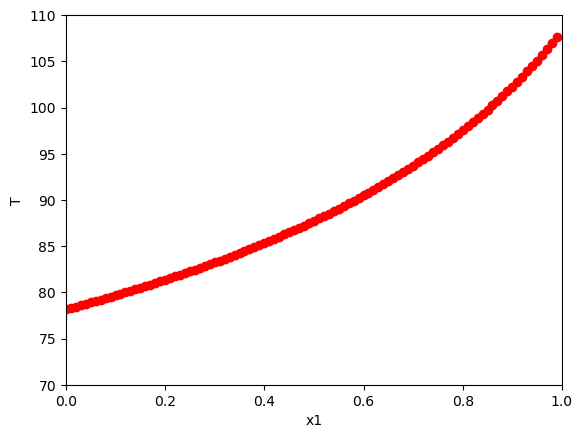

In [1]:
for x1 in np.arange(0,1,0.01):
    x2=1-x1
    Δ𝐻𝑣𝑎𝑝=x1*Δ𝐻𝑣𝑎𝑝1+x2*Δ𝐻𝑣𝑎𝑝2
    P1=P1tol*x1+P1benz*x2
    T=1/(np.log(P1/P2)*R/Δ𝐻𝑣𝑎𝑝+1/T1)-273.15 
    plt.scatter(x1,T,color='r',linewidth=1,linestyle="-")
    plt.xlabel('x1')
    plt.ylabel('T')
ax = plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(70,110)
ax = plt.gca()
plt.show()


现在，计算并绘制每种温度下蒸汽中甲苯的摩尔分数。保持甲苯的摩尔分数为x轴，温度为y轴。

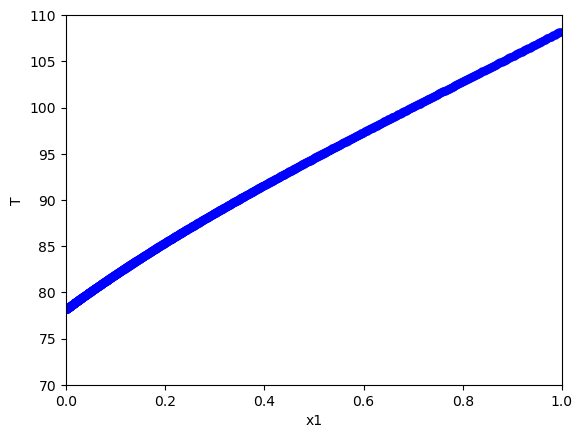

In [8]:
for x1 in np.arange(0,1,0.001):
    x2=1-x1
    Δ𝐻𝑣𝑎𝑝=x1*Δ𝐻𝑣𝑎𝑝1+x2*Δ𝐻𝑣𝑎𝑝2
    P1=P1tol*x1+P1benz*x2
    T=1/(np.log(P1/P2)*R/Δ𝐻𝑣𝑎𝑝+1/T1)-273.15 
    T0=T+273.15
    P2tol=np.e**(np.log(P1tol)-Δ𝐻𝑣𝑎𝑝1/R*(1/𝑇0-1/T1))   #甲苯在沸点下的蒸汽压
    P2benz=np.e**(np.log(P1benz)-Δ𝐻𝑣𝑎𝑝2/R*(1/𝑇0-1/𝑇1))  #苯在沸点下的蒸汽压
    p1=P2tol*x1
    p2=P2benz*x2
    x0=p1/(p1+p2)           #蒸汽中甲苯的摩尔分数
    plt.scatter(x0,T,color="b",linewidth=0.1,linestyle="-")
    plt.xlabel('x1')
    plt.ylabel('T')
ax = plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(70,110)
ax = plt.gca()
plt.show()

将两条曲线绘制在同一张图上。现在你有了苯-甲苯系统的蒸馏相图（假设溶液为理想体系）！

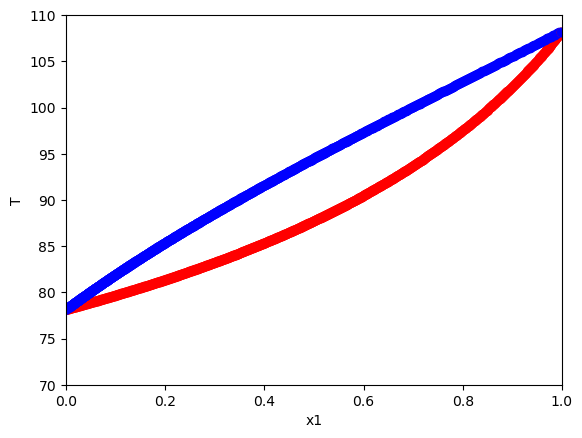

In [4]:
for x1 in np.arange(0,1,0.001):
    x2=1-x1
    Δ𝐻𝑣𝑎𝑝=x1*Δ𝐻𝑣𝑎𝑝1+x2*Δ𝐻𝑣𝑎𝑝2
    P1=P1tol*x1+P1benz*x2
    T=1/(np.log(P1/P2)*R/Δ𝐻𝑣𝑎𝑝+1/T1)-273.15
    T0=T+273.15
    P2tol=np.e**(np.log(P1tol)-Δ𝐻𝑣𝑎𝑝1/R*(1/𝑇0-1/T1))   #甲苯在沸点下的蒸汽压
    P2benz=np.e**(np.log(P1benz)-Δ𝐻𝑣𝑎𝑝2/R*(1/𝑇0-1/𝑇1))  #苯在沸点下的蒸汽压
    p1=P2tol*x1
    p2=P2benz*x2
    x0=p1/(p1+p2)           #蒸汽中甲苯的摩尔分数
    plt.scatter(x1,T,color="r")
    plt.scatter(x0,T,color="b")
    plt.xlabel('x1')
    plt.ylabel('T')
ax = plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(70,110)
ax = plt.gca()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
R=0.008314
P1tol=22
P1benz=76
P2=760
Δ𝐻𝑣𝑎𝑝1=37.3
Δ𝐻𝑣𝑎𝑝2=33.9
t1=20
T1=t1+273.15

import numpy as np
import matplotlib.pyplot as plt 
P1tol=float(input("输入P1tol的值："))
P1benz=float(input("输入P1benz的值："))
P2=760
T1=float(input("输入t1的值："))+273.15
Δ𝐻𝑣𝑎𝑝1=float(input("输入Δ𝐻𝑣𝑎𝑝1的值："))
Δ𝐻𝑣𝑎𝑝2=float(input("输入Δ𝐻𝑣𝑎𝑝2的值：")) 
R=0.008314